In [2]:
#DS imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from scipy import stats


#Modeling and scaling
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

#My files
import env
import wrangle as w
import model as m

np.random.seed(123)

## Exercises: Getting Data

In [3]:
#get zillow data
df =w.get_zillow_data()

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
#Clean Zillow data
df = w.clean_zillow(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 115.0 MB


In [7]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [8]:
#Drop null values for zillow
df = df.dropna()

In [9]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.6 MB


In [11]:
df.describe()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

In [12]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [13]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1567874,3.0,1.0,1248.0,191578.0,1950.0,2712.21,6037.0
1218139,2.0,2.0,1326.0,1345206.0,1950.0,16539.04,6037.0
339661,2.0,1.0,1053.0,356648.0,1953.0,4575.16,6037.0
1017134,3.0,2.0,1256.0,175069.0,1946.0,2635.51,6037.0
40250,3.0,2.0,1640.0,543000.0,1957.0,6344.96,6059.0


In [14]:
# Validate my split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (1198531, 7)
validate -> (513657, 7)
test -> (428047, 7)


In [36]:
#Make a copy of my training set to scale
train_scaled = train.copy()
train_scaled2 = train.copy()
train_scaled3 = train.copy()

### Looking at this dataset, we want to scale several columns: bedrooms, bathrooms, tax_value

### Min-Max Scaler

In [37]:
scale_columns = ['bedrooms', 'bathrooms', 'tax_value']

In [17]:
#Using min max scaler
scaler = MinMaxScaler()

In [18]:
#Fit and transformed on training data
train_scaled[scale_columns] = scaler.fit_transform(train[scale_columns])

In [19]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1567874,0.200000,0.03125,1248.0,0.002124,1950.0,2712.21,6037.0
1218139,0.133333,0.06250,1326.0,0.014915,1950.0,16539.04,6037.0
339661,0.133333,0.03125,1053.0,0.003954,1953.0,4575.16,6037.0
1017134,0.200000,0.06250,1256.0,0.001941,1946.0,2635.51,6037.0
40250,0.200000,0.06250,1640.0,0.006020,1957.0,6344.96,6059.0


In [20]:
#Drop columns not scaled
train_scaled_minmax = train_scaled.drop(['area', 'year_built', 'tax_amount', 'fips'], axis=1)

Text(0.5, 1.0, 'Scaled')

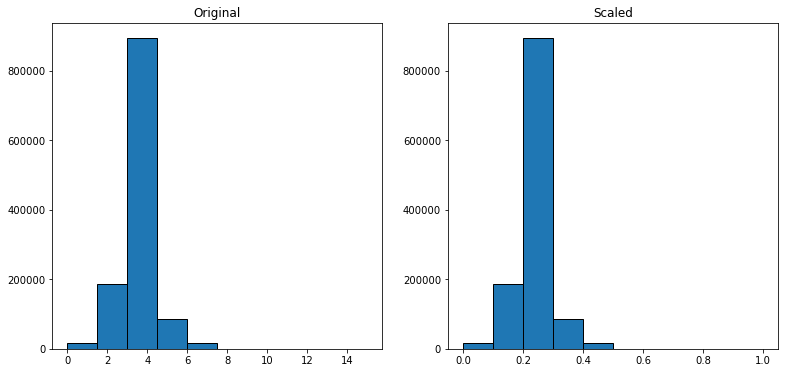

In [21]:
#Visualize this for bedrooms

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.bedrooms, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_minmax.bedrooms, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

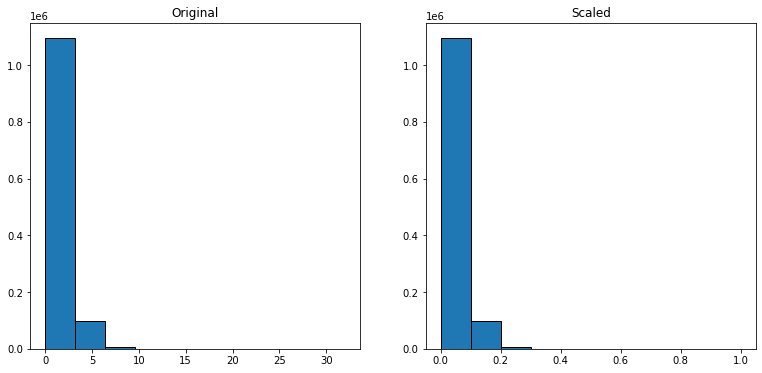

In [22]:
#Visualize this for bathrooms
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.bathrooms, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.bathrooms, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

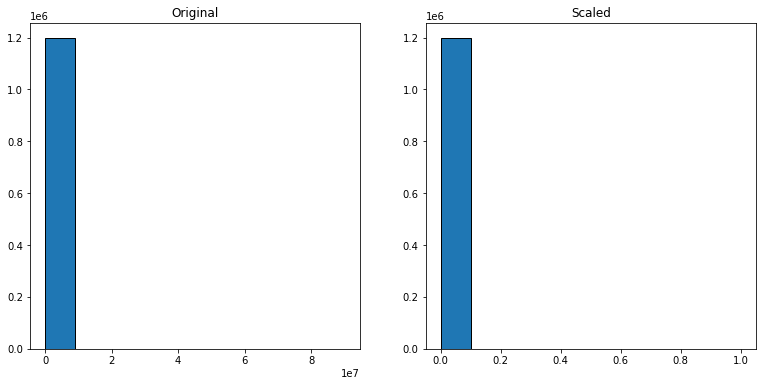

In [23]:
#Visualize this for tax_value
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tax_value, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled.tax_value, ec='black')
plt.title('Scaled')

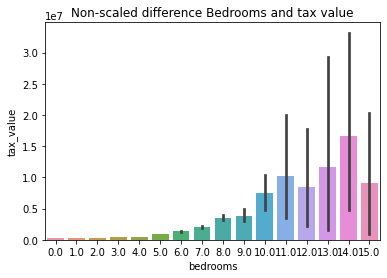

In [24]:
plt.title("Non-scaled difference Bedrooms and tax value")
sns.barplot(x="bedrooms", y="tax_value", data=train)
plt.show()

<AxesSubplot:title={'center':'Scaled comparison bedrooms and tax value'}, xlabel='bedrooms', ylabel='tax_value'>

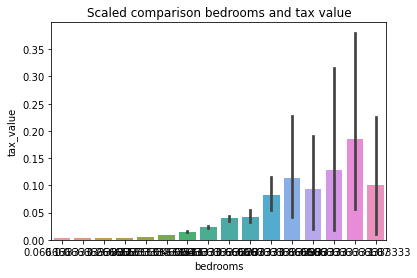

In [25]:
plt.title("Scaled comparison bedrooms and tax value")
sns.barplot(x="bedrooms", y="tax_value", data=train_scaled_minmax)

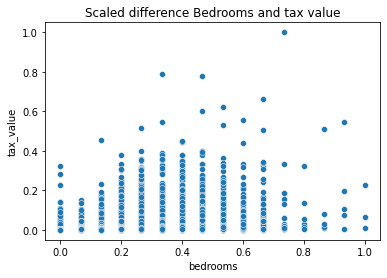

In [26]:
plt.title("Scaled difference Bedrooms and tax value")
sns.scatterplot(x="bedrooms", y="tax_value", data= train_scaled)
plt.show()

### Standard Scaler

In [27]:
#Standard Scaler
scaler = StandardScaler()
# Fit and transform on training data
train_scaled[scale_columns] = scaler.fit_transform(train[scale_columns])

In [28]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1567874,-0.323211,-1.250727,1248.0,-0.391617,1950.0,2712.21,6037.0
1218139,-1.395264,-0.242709,1326.0,1.282932,1950.0,16539.04,6037.0
339661,-1.395264,-1.250727,1053.0,-0.152009,1953.0,4575.16,6037.0
1017134,-0.323211,-0.242709,1256.0,-0.415580,1946.0,2635.51,6037.0
40250,-0.323211,-0.242709,1640.0,0.118490,1957.0,6344.96,6059.0


In [29]:
#Drop columns not scaled
train_scaled_standard = train_scaled.drop(['area', 'year_built', 'tax_amount', 'fips'], axis=1)

In [30]:
train_scaled_standard.head()

,bedrooms,bathrooms,tax_value
1567874,-0.323211,-1.250727,-0.391617
1218139,-1.395264,-0.242709,1.282932
339661,-1.395264,-1.250727,-0.152009
1017134,-0.323211,-0.242709,-0.415580
40250,-0.323211,-0.242709,0.118490


Text(0.5, 1.0, 'Scaled')

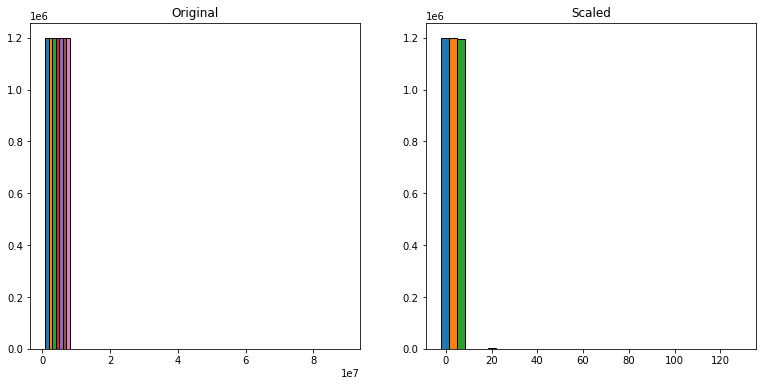

In [31]:
#Visualize
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_standard, ec='black')
plt.title('Scaled')

### Robust Scaler

In [32]:
#Robust Scaler
scaler = RobustScaler()
# Fit and transform on training data
train_scaled[scale_columns] = scaler.fit_transform(train[scale_columns])

In [33]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1567874,0.0,-1.0,1248.0,-0.396434,1950.0,2712.21,6037.0
1218139,-1.0,0.0,1326.0,2.940577,1950.0,16539.04,6037.0
339661,-1.0,-1.0,1053.0,0.081051,1953.0,4575.16,6037.0
1017134,0.0,0.0,1256.0,-0.444188,1946.0,2635.51,6037.0
40250,0.0,0.0,1640.0,0.620097,1957.0,6344.96,6059.0


In [34]:
#Drop columns not scaled
train_scaled_robust = train_scaled.drop(['area', 'year_built', 'tax_amount', 'fips'], axis=1)

Text(0.5, 1.0, 'Scaled')

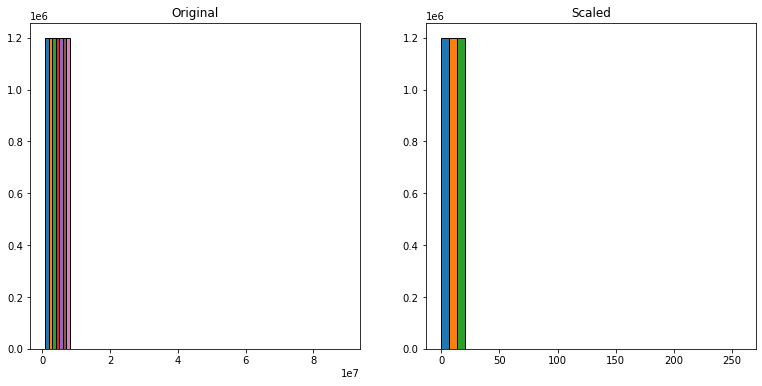

In [35]:
#Visualize this
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_robust, ec='black')
plt.title('Scaled')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.